![forestfire_1280p.jpg](https://i.imgur.com/O268I6T.jpg)

## 브라질 산불(wildfire) 데이터 분석 

20년간 브라질 산불 데이터 분석 

데이터는 1998년에서 2017년도 브라질의 모든 주


# I. Data Imports
데이터 불러오고 전처리하기

# 판다스 사용

데이터 불러오고 전처리하기

In [1]:
# Import libraries
import pandas as pd

# 넘파이 

데이터를 빠르게 처리하기

In [2]:
import numpy as np

# matplotlib 

그림을 그리자

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn

그림을 추가로 예쁘게 그린다

In [4]:
import seaborn as sns

# 판다스로 데이터 불러오기

파일의 앞부분을 프린트하기 head(7)

In [5]:
# Data Import
data = pd.read_csv('./input/amazon.csv', encoding='latin1')
data.head(10)

year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01
5  2003  Acre  Janeiro    10.0  2003-01-01
6  2004  Acre  Janeiro     0.0  2004-01-01
7  2005  Acre  Janeiro    12.0  2005-01-01
8  2006  Acre  Janeiro     4.0  2006-01-01
9  2007  Acre  Janeiro     0.0  2007-01-01

In [6]:
data.tail(5)

year      state     month  number        date
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

산불 빅 데이터는 6454개가 있으며, 1988년에서 2017년까지 기록된 산불 데이터이다. 

In [7]:
statistics = data['number'].describe().reset_index()

In [8]:
statistics.style.format({"number": "{:20,.0f}"}).hide_index().highlight_max(color='#FFB27A')

데이터의 언어를 영어로 다시 표현하기 

In [9]:
# Recode months into english
data['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
data['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
data['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
data['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
data['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
data['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
data['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
data['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
data['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
data['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
data['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
data['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)

In [10]:
data.head(5)

year state month  number        date
0  1998  Acre   Jan     0.0  1998-01-01
1  1999  Acre   Jan     0.0  1999-01-01
2  2000  Acre   Jan     0.0  2000-01-01
3  2001  Acre   Jan     0.0  2001-01-01
4  2002  Acre   Jan     0.0  2002-01-01

In [11]:
# Group data by year, state, month
year_mo_state = data.groupby(by = ['year','state', 'month']).sum().reset_index()

year_mo_state.head()

year state month  number
0  1998  Acre   Apr     0.0
1  1998  Acre   Aug   130.0
2  1998  Acre   Dec     7.0
3  1998  Acre   Feb     0.0
4  1998  Acre   Jan     0.0

# II. 시각화와 이해




년도별 산불 발생 건수의 증가를 살펴보자. 
산불이 가장 많이 발생한 년도는 언제인가?

In [19]:
# Set up the defaults
sns.set_style('whitegrid')

In [20]:
from matplotlib.pyplot import MaxNLocator, FuncFormatter

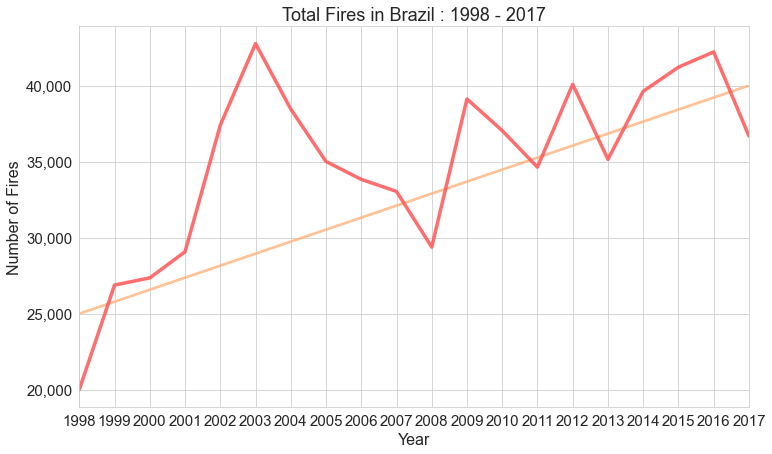

In [21]:
plt.figure(figsize=(12,7))

# Make the plot
ax = sns.lineplot(x = 'year', y = 'number', 
                  data = year_mo_state, estimator = 'sum', 
                  color = '#FF5555', lw = 3.5, err_style = None , alpha = 0.85)

# Create a line
import pylab as p
p.arrow( 1998, 25000, 19, 15000, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 0.15, alpha = 0.7, shape = "full")

# Make pretty
plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Fires', fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))



이제, 월별 데이터를 분석해 보자 

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

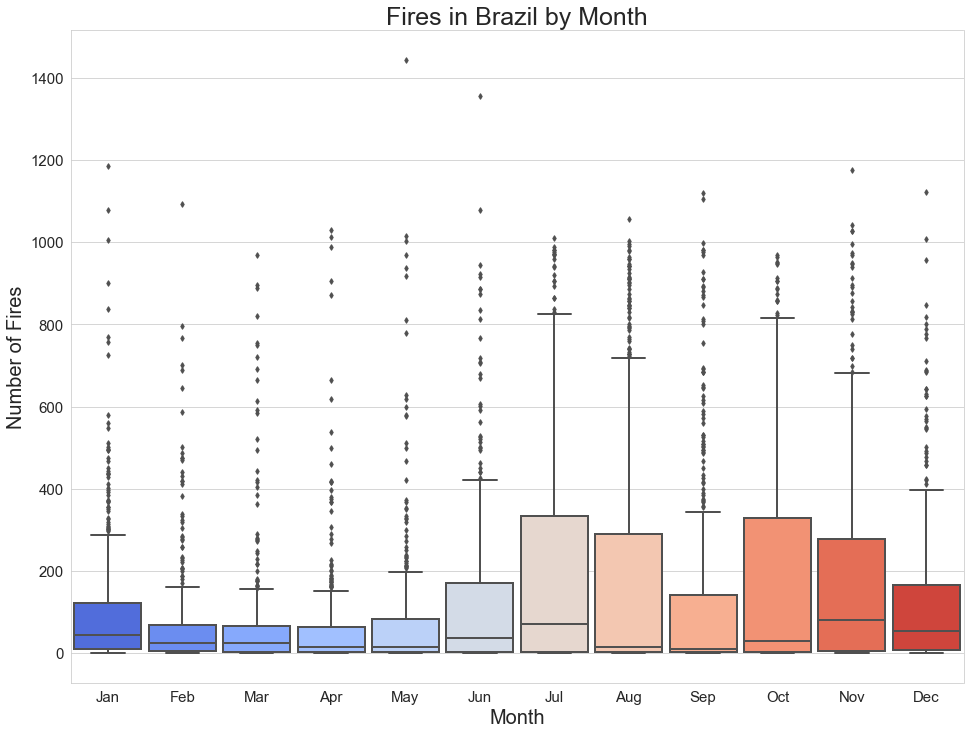

In [22]:
# Figure size
plt.figure(figsize=(16,12))

# The plot
sns.boxplot(x = 'month', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], 
            y = 'number', data = year_mo_state, palette = "coolwarm", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Make pretty
plt.title('Fires in Brazil by Month', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### 아마존 주에 관심을 갖고 분석해보자


In [23]:
# First create the data
year_mo_state_Amazon = data[data['state'] == 'Amazonas'].groupby(by = ['year','state', 'month']).sum().reset_index()

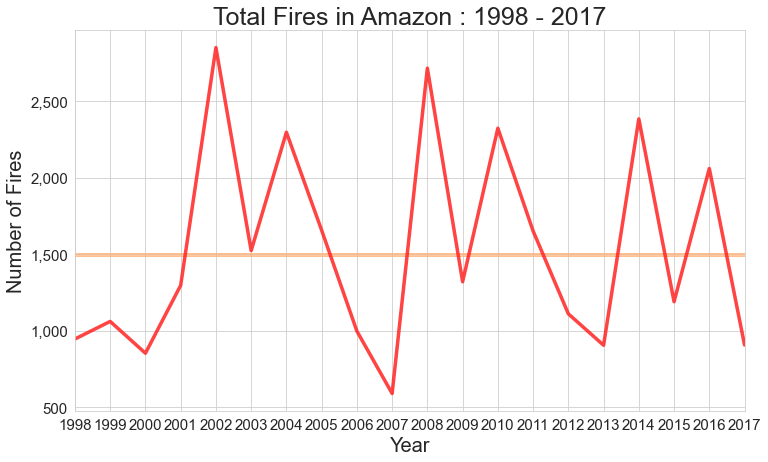

In [24]:
# Set up the figure size
plt.figure(figsize=(12,7))

# CReate the plot
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_Amazon, estimator = 'sum', color = '#FF2323', lw = 3.5, 
                  err_style = None, alpha = 0.85)

# Add line
p.arrow( 1998, 1500, 19, 0, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 20, alpha = 0.7, shape = "full")

# Make pretty
plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

아마존은 브라질에서 산불 발생이 많은 곳은 아니다. 10위 정도이다. 

In [27]:
# Creating the top 10 dataframe
states_fires = data.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10).reset_index()
states_fires = states_fires.sort_values(by = 'number', ascending = True)

states_fires

state     number
9      Amazonas  30650.129
8     Tocantins  33707.885
7  Minas Gerais  37475.258
6         Goias  37695.520
5          Piau  37803.747
4         Bahia  44746.226
3           Rio  45160.865
2     Sao Paulo  51121.198
1       Paraiba  52435.918
0   Mato Grosso  96246.028

No handles with labels found to put in legend.


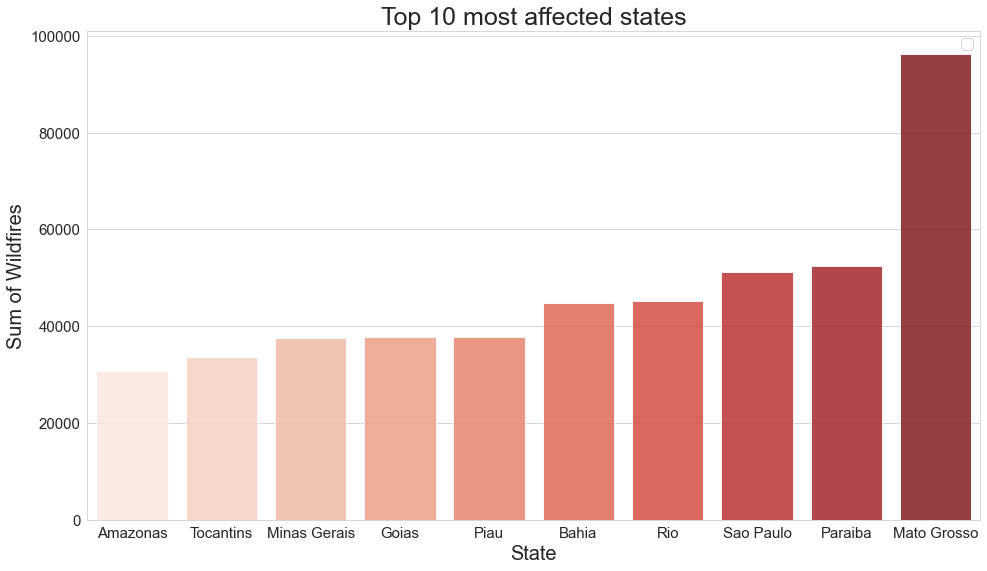

In [28]:
# Set figure size
plt.figure(figsize = (16, 9))

# plot
ax = sns.barplot(x = states_fires['state'], y = states_fires['number'], palette = "Reds", alpha = 0.85)

# Make pretty
plt.title("Top 10 most affected states", fontsize = 25)
plt.xlabel("State", fontsize = 20)
plt.ylabel("Sum of Wildfires", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)



### States in Brazil
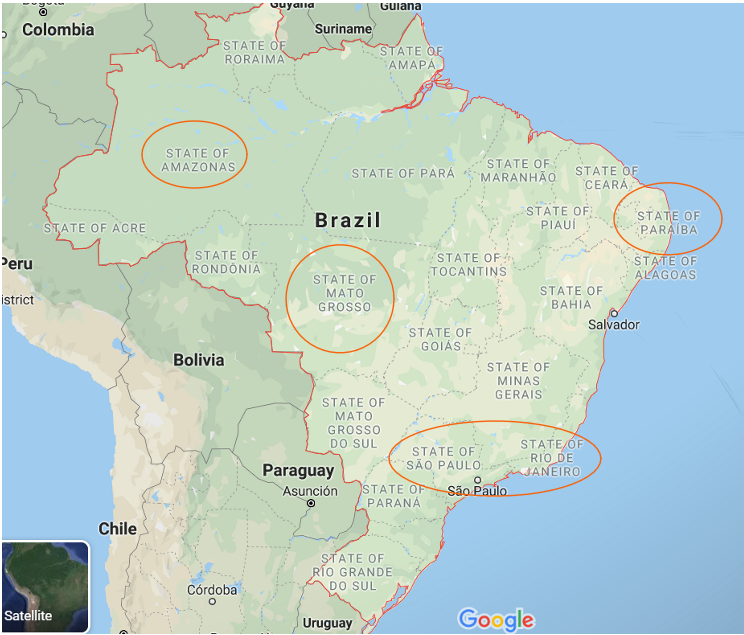


### Amazonian Rainforest spread
![Amazon](https://i.imgur.com/uc9oGxP.jpg)


In the graph below you can see how far Mato Grosso is from the other states in terms of wildfires. It looks like it is also the only one increasing, while the others have a ~ "white noise" distribution, like we saw for Amazon.